**a quick, possibly (certainly) buggy analysis of the cornavirus data on Kaggle https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset**

Visualizing the number of deaths, and the presence of the virus by country

TODO: 
* export the bokeh interactive plot to the web
* normalize by population
* review and kill bugs
* review and simplify syntax
* review and comment for posterity

In [1]:
!pip install kaggle
!pip install geopandas

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 
     |████████████████████████████████| 10.4MB 27.1MB/s 


In [2]:
import pandas as pd
import pylab as pl
import geopandas as gpd
import shapely
import json
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [5]:
!ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json


In [0]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [8]:
!kaggle datasets list -s coronavirus


ref                                                                    title                                                size  lastUpdated          downloadCount  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
kimjihoo/coronavirusdataset                                            Coronavirus-Dataset                                  31KB  2020-03-10 05:40:00           9392  
jamzing/sars-coronavirus-accession                                     SARS CORONAVIRUS ACCESSION                            2MB  2020-02-18 15:49:34           2130  
brendaso/2019-coronavirus-dataset-01212020-01262020                    2019 Coronavirus dataset (January - February 2020)   53KB  2020-02-06 18:09:28           7783  
sudalairajkumar/novel-corona-virus-2019-dataset                        Novel Corona Virus 2019 Dataset                     340KB  2020-03-10 06:40:14          30265 

In [0]:
!mkdir cv19

In [10]:
cd cv19/


/content/gdrive/My Drive/cv19


In [0]:
mkdir data


In [12]:
cd data

/content/gdrive/My Drive/cv19/data


In [13]:
!kaggle datasets download kimjihoo/coronavirusdataset  

  0% 0.00/30.7k [00:00<?, ?B/s]
100% 30.7k/30.7k [00:00<00:00, 4.61MB/s]


In [14]:
ls

coronavirusdataset.zip


In [15]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
  inflating: group.csv               
  inflating: patient.csv             
  inflating: route.csv               
  inflating: time.csv                
  inflating: trend.csv               


In [16]:
cd ../


/content/gdrive/My Drive/cv19


In [17]:
!ls

data


In [0]:
patients = pd.read_csv("data/patient.csv")

In [19]:
patients.describe()

,id,birth_year,disease,infection_order,infected_by,contact_number
count,7513.000000,649.000000,28.0,35.000000,70.000000,50.000000
mean,3757.000000,1973.959938,1.0,2.285714,379.000000,69.400000
std,2168.960619,17.423331,0.0,1.405272,540.247528,182.876338
min,1.000000,1929.000000,1.0,1.000000,3.000000,0.000000
25%,1879.000000,1961.000000,1.0,1.000000,29.250000,3.000000
50%,3757.000000,1974.000000,1.0,2.000000,126.000000,15.500000
75%,5635.000000,1990.000000,1.0,3.000000,563.250000,44.500000
max,7513.000000,2018.000000,1.0,6.000000,2621.000000,1160.000000


In [0]:
#get rid of Nan, to date_time object
#age of patients that died
patients.dropna(subset = {'deceased_date'}, inplace = True)

In [0]:
patients['deceased_date'] = pd.to_datetime(patients['deceased_date'])

In [56]:
patients.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
37,38,female,1963.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
53,54,male,1963.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased
54,55,male,1961.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased
103,104,male,1957.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased
106,107,male,1953.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased


In [57]:
patients['birth_year']

37      1963.0
53      1963.0
54      1961.0
103     1957.0
106     1953.0
113     1946.0
204     1965.0
285     1958.0
297     1962.0
390     1937.0
442     1979.0
619     1949.0
874     1984.0
900     1934.0
924     1951.0
1063    1943.0
1287    1955.0
1442    1945.0
1920    1953.0
2084    1949.0
2288    1954.0
2578    1940.0
2613    1943.0
2768    1934.0
2935    1939.0
3549    1951.0
3577    1930.0
3895    1933.0
3913    1938.0
4045    1962.0
5142    1960.0
5459    1940.0
5766    1938.0
5767    1935.0
6284    1929.0
7195    1945.0
Name: birth_year, dtype: float64

In [0]:
patients = pd.to_datetime(patients['birth_year'], format = '%Y')

AttributeError: ignored

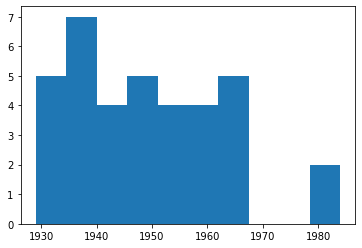

In [63]:
hist = patients.hist(column = {'birth_year', 'deceased_date'})

In [52]:
patients.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
37,38,female,1963-01-01,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
53,54,male,1963-01-01,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased
54,55,male,1961-01-01,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased
103,104,male,1957-01-01,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased
106,107,male,1953-01-01,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased


In [0]:
patients['birth_year'] = pd.to_datetime(patients['birth_year'])

In [42]:
patients.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
37,38,female,1970-01-01 00:00:00.000001963,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
53,54,male,1970-01-01 00:00:00.000001963,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased
54,55,male,1970-01-01 00:00:00.000001961,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased
103,104,male,1970-01-01 00:00:00.000001957,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased
106,107,male,1970-01-01 00:00:00.000001953,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased


In [32]:
a

37      2020-02-23
53      2020-02-23
54      2020-02-23
103     2020-02-19
106     2020-02-24
113     2020-02-26
204     2020-02-21
285     2020-02-23
297     2020-02-25
390     2020-03-05
442     2020-02-22
619     2020-03-02
874     2020-02-25
900     2020-03-04
924     2020-02-24
1063    2020-03-01
1287    2020-03-02
1442    2020-02-27
1920    2020-03-05
2084    2020-03-04
2288    2020-03-05
2578    2020-03-01
2613    2020-03-01
2768    2020-03-02
2935    2020-03-06
3549    2020-03-09
3577    2020-03-07
3895    2020-03-03
3913    2020-03-09
4045    2020-03-01
5142    2020-03-04
5459    2020-03-05
5766    2020-03-05
5767    2020-03-05
6284    2020-03-04
7195    2020-03-09
Name: deceased_date, dtype: object

In [30]:
patients.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [20]:
patients.head()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [21]:
patients.tail()

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
7508,7509,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7509,7510,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7510,7511,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7511,7512,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
7512,7513,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated


Pandas datetime variables
https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html